In [1]:
#####################################################################
# This notebook is authored by: Lina Alasfar                        #
# Date: May 2022                                                    #
# If you use this code or the results from this work please cite:   # 
# Machine learning the trilinear and light-quark Yukawa couplings   #
# from Higgs pair kinematic shapes                                  #
# Lina Alasfar, Ramona Gröber, Christophe Grojean, Ayan Paul        #
# and Zuoni Qian                                                    #
# arXiv:2205.XXXXX (https://arxiv.org/abs/2005.XXXXX)               # 
#####################################################################


#####################################################################
# Plot Single and Di-Higgs cross sections               # 
#####################################################################

import numpy as np
import pandas as pd
from matplotlib.ticker import NullFormatter, LogLocator
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import AutoMinorLocator
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
## ***************************************************************************
## * RC param                                                                 *
## ***************************************************************************
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.labelsize'] = 23
plt.rcParams['ytick.labelsize'] = 23
plt.rcParams['font.family'] = 'monospace'
## ***************************************************************************
LambdaNP2 = 1e+3**2
v4 = 246.**4
mh2 = 125.1**2

kltoCH = lambda x : LambdaNP2/v4*mh2*0.5*(1-x)

In [2]:
LambdaNP = 1e+3  #GeV
v = 246.
mh = 125.1
mass = {
'ku':2.2e-3,
'kd':4.7e-3,
'ks':95e-3,
'kc':1.275,
}

def kqtoCqH(kq,op):
    if op=='ku'or op=='kd'or op=='ks' or  op=='kc':
        return LambdaNP**2/v**3*(np.sqrt(2.0)*mass[op]*(1-kq))
    else:
        return kq

def CqHtokq(CqH,op):
    if op=='ku'or op=='kd'or op=='ks' or  op=='kc':
        return -(CqH/np.sqrt(2)/LambdaNP**2 *v**3/mass[op])+1
    else:
        return CqH
    
def xinverse(x):
    return kqtoCqH(x,'kd')

def xforward(x):
    return CqHtokq(x,'kd')

def xinverse2(x):
    return kqtoCqH(x,'ku')

def xforward2(x):
    return CqHtokq(x,'ku')
######################################################################

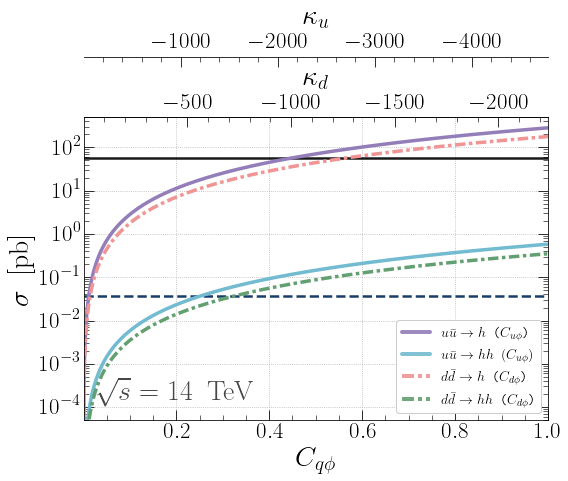

In [3]:
# all in pb
uuh = lambda cqphi:283.1877 * cqphi**2 
ddh = lambda cqphi: 178.110* cqphi**2
uuhh = lambda cqphi: 0.5813103*cqphi**2 #-0.0126818*cqphi 
ddhh= lambda cqphi: 0.3499139*cqphi**2 #+ 0.0018412*cqphi

ggFh = 56.36
ggFhh= 36.92e-3

fig, ax = plt.subplots(1, figsize=(8, 7))
colpastil = ['#937eba','#72bbd0','#f09494','#62a071']
X = np.linspace(0., 1.0, 1000)

plt.axhline(y=ggFh, color='k', linewidth=2.5, alpha=0.9, linestyle='solid')
plt.axhline(y=ggFhh, color='#002859', linewidth=2.5, alpha=0.9, linestyle='dashed')
plt.plot(X, uuh(X), color=colpastil[0], linewidth=3.5, alpha=1)
plt.plot(X, uuhh(X), color=colpastil[1], linewidth=3.5, alpha=1)
plt.plot(X, ddh(X), color=colpastil[2], linewidth=3.5, alpha=1, linestyle=(0, (3, 1, 1, 1)))
plt.plot(X, ddhh(X), color=colpastil[3], linewidth=3.5, alpha=1, linestyle=(0, (3, 1, 1, 1)))

labels = [r'$u\bar u \to h$ ($C_{u\phi}$)', r'$ u \bar u \to hh$ $(C_{u\phi}) $', r'$d \bar d \to h$ ($C_{d\phi}$)',r'$d \bar d \to hh$ ($C_{d\phi}$)']
line0 = Line2D([0], [0], color=colpastil[0], linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line1 = Line2D([0], [0], color=colpastil[1], linewidth=4, linestyle='-', solid_capstyle='round', markersize=10, alpha=0.9)
line2 = Line2D([0], [0], color=colpastil[2], linewidth=4, linestyle=(0, (3, 1, 1, 1)), solid_capstyle='round', markersize=10, alpha=0.9)
line3 = Line2D([0], [0], color=colpastil[3], linewidth=4, linestyle=(0, (3, 1, 1, 1)), solid_capstyle='round', markersize=10, alpha=0.9)

leg = plt.legend(handles=[line0, line1, line2,line3], labels=labels, 
                 #bbox_to_anchor=[0.575, 0.85],
                    loc='lower right', prop={'size': 14}, fancybox=True, framealpha=1, columnspacing=1,
                    ncol=1)

plt.xlim((0.001, 1.))
ax.set_ylim(5.0e-5, 500.0)
plt.xlabel(r'$C_{q\phi}$', fontsize=28)
plt.ylabel(r'$\sigma$ $\mathrm{[pb]}$', fontsize=28)
plt.semilogy()
locmajy = LogLocator(base=10,numticks=100) 
locminy = LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)
ax.yaxis.set_major_locator(locmajy)
ax.yaxis.set_minor_locator(locminy)
ax.yaxis.set_minor_formatter(NullFormatter())
plt.tick_params(axis="x", labelsize=23)
plt.tick_params(axis="y", labelsize=23)
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.annotate(r'$\sqrt{s}=14$ $\mathrm{TeV}$', xy=(0.2, 1e-4), xycoords='data', horizontalalignment='center',
                verticalalignment='bottom', fontsize=28, fontweight='900', zorder=100, color='#474747')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,       # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off)
)

secax = ax.secondary_xaxis('top', functions=(xforward, xinverse))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel(r"$\kappa_d$", fontsize=28,labelpad=10)

secax2 = ax.secondary_xaxis(1.2,functions=(xforward2, xinverse2),)
secax2.xaxis.set_minor_locator(AutoMinorLocator())
secax2.set_xlabel(r"$\kappa_u$", fontsize=28,labelpad=10)
plt.grid(linestyle=':')
plt.tight_layout()
#
plt.savefig('../plots/single-diHiggs.pdf', dpi=300)
plt.show()